# Generate uniformly distributed seed points

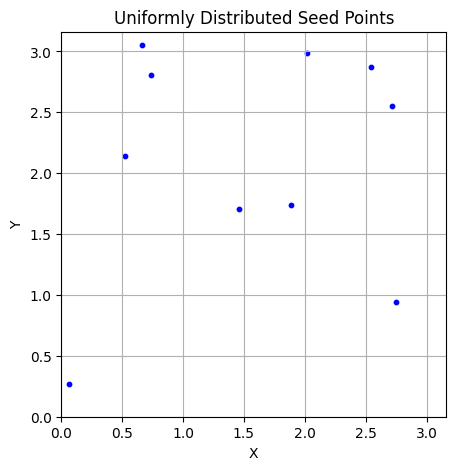

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

N = 10

Lx = np.sqrt(N)
Ly = np.sqrt(N)

# Generate two-dimensional coordinates
x = np.random.uniform(0, Lx, N)
y = np.random.uniform(0, Ly, N)

# Combine coordinates into a single array
seed_points = np.vstack((x, y)).T

# Plot the seed points
plt.figure(figsize=(5, 5))
plt.scatter(seed_points[:, 0], seed_points[:, 1], color='blue', s=10)
plt.xlim(0, Lx)
plt.ylim(0, Ly)
plt.title('Uniformly Distributed Seed Points')
plt.xlabel('X')
plt.ylabel('Y')
plt.gca().set_aspect('equal', adjustable='box')
plt.grid(True)
plt.show()

# Generate periodic images of the original seed points

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Given:
N = 20
Lx = np.sqrt(N)
Ly = np.sqrt(N)

x = np.random.uniform(0, Lx, N)
y = np.random.uniform(0, Ly, N)
seed_points = np.column_stack((x, y))  # shape (N, 2)

# Masks relative to box center
mx_left  = seed_points[:, 0] >  Lx/2  # shift by (-Lx, 0)
mx_right = seed_points[:, 0] <  Lx/2  # shift by (+Lx, 0)
my_down  = seed_points[:, 1] >  Ly/2  # shift by (0, -Ly)
my_up    = seed_points[:, 1] <  Ly/2  # shift by (0, +Ly)

# 1) originals (first N)
pts = [seed_points]

# 2) left/right shifts
pts.append(seed_points[mx_left]  + np.array([-Lx, 0.0]))
pts.append(seed_points[mx_right] + np.array([+Lx, 0.0]))

# 3) up/down shifts
pts.append(seed_points[my_down]  + np.array([0.0, -Ly]))
pts.append(seed_points[my_up]    + np.array([0.0, +Ly]))

# 4) corner shifts (apply both x and y)
pts.append(seed_points[mx_left  & my_down] + np.array([-Lx, -Ly]))
pts.append(seed_points[mx_left  & my_up]   + np.array([-Lx, +Ly]))
pts.append(seed_points[mx_right & my_down] + np.array([+Lx, -Ly]))
pts.append(seed_points[mx_right & my_up]   + np.array([+Lx, +Ly]))

# Final array: originals first, then all shifted copies
augmented_points = np.vstack(pts)

print("Original N:", N)
print("Augmented total:", augmented_points.shape[0])


Original N: 20
Augmented total: 80


# Generate periodic Voronoi tesselation

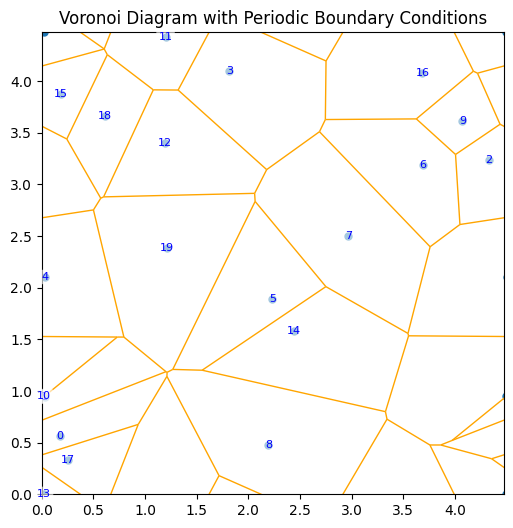

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi
from scipy.spatial import voronoi_plot_2d

# Given:
N_central_seeds = 20
Lx = np.sqrt(N_central_seeds)
Ly = np.sqrt(N_central_seeds)

# Derived:
N_extended_seeds = 4*N_central_seeds
Ld = np.sqrt(Lx**2 + Ly**2)

# Generate central seed coordinates
x = np.random.uniform(0, Lx, N_central_seeds)
y = np.random.uniform(0, Ly, N_central_seeds)
central_seed_coords = np.column_stack((x, y))  # shape (N, 2)

# Masks relative to box center
mx_left  = central_seed_coords[:, 0] >  Lx/2  # shift by (-Lx, 0)
mx_right = central_seed_coords[:, 0] <  Lx/2  # shift by (+Lx, 0)
my_down  = central_seed_coords[:, 1] >  Ly/2  # shift by (0, -Ly)
my_up    = central_seed_coords[:, 1] <  Ly/2  # shift by (0, +Ly)

# 1) originals (first N)
coords = [central_seed_coords]

# 2) left/right shifts
coords.append(central_seed_coords[mx_left]  + np.array([-Lx, 0.0]))
coords.append(central_seed_coords[mx_right] + np.array([+Lx, 0.0]))

# 3) up/down shifts
coords.append(central_seed_coords[my_down]  + np.array([0.0, -Ly]))
coords.append(central_seed_coords[my_up]    + np.array([0.0, +Ly]))

# 4) corner shifts (apply both x and y)
coords.append(central_seed_coords[mx_left  & my_down] + np.array([-Lx, -Ly]))
coords.append(central_seed_coords[mx_left  & my_up]   + np.array([-Lx, +Ly]))
coords.append(central_seed_coords[mx_right & my_down] + np.array([+Lx, -Ly]))
coords.append(central_seed_coords[mx_right & my_up]   + np.array([+Lx, +Ly]))

# Final array: originals first, then all shifted copies
extended_seed_coords = np.vstack(coords)

# Generate extended_seed_image_indices
extended_seed_image_indices = np.zeros((N_extended_seeds,3), dtype=int)
for n in range(N_extended_seeds):
    q = 0
    for m in range(N_extended_seeds):
        if m != n:
            dist = np.linalg.norm(extended_seed_coords[n] - extended_seed_coords[m])
            if (np.abs(dist - Lx) < 1e-8) or (np.abs(dist - Ly) < 1e-8) or (np.abs(dist - Ld) < 1e-8):
                extended_seed_image_indices[n, q] = m
                q += 1

vor = Voronoi(extended_seed_coords)
fig, ax = plt.subplots(figsize=(6, 6))
voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors='orange', line_width=1, point_size=10)
ax.set_xlim(0, Lx)
ax.set_ylim(0, Ly)
ax.set_aspect('equal', adjustable='box')
ax.set_title('Voronoi Diagram with Periodic Boundary Conditions')

for i, (px, py) in enumerate(central_seed_coords):  # i is 0..N_central_seeds-1
    ax.text(px, py, str(i),
            fontsize=8, ha='center', va='center',
            color='blue', bbox=dict(boxstyle='round,pad=0.2', fc='white', ec='none', alpha=0.6))

plt.show()

# Investigate the structure of vor

When you call

```python
vor = Voronoi(augmented_points)
```

the variable `vor` becomes an instance of **`scipy.spatial.Voronoi`**, which is a structured object (not a simple array).
It contains everything needed to describe the full Voronoi diagram.
Here’s its internal structure and meaning of the main fields:

---

### 🔹 `vor.points`

The coordinates of all input points (your `augmented_points` array).
Shape: `(N_total, 2)` for 2D.
These are the **sites** or **seeds** of the Voronoi diagram.

---

### 🔹 `vor.vertices`

An array of all **Voronoi vertices** (intersection points of region edges).
Shape: `(M, 2)`
These are the finite points where 3 or more Voronoi edges meet.
Some regions extend to infinity; those will refer to a vertex index `-1`.

---

### 🔹 `vor.regions`

A **list of lists**.
Each item corresponds to one *Voronoi region* (a polygonal cell).
Each sublist contains indices into `vor.vertices`.
If a region has `-1` in it, that means it is **open** (unbounded).

Example:

```python
vor.regions[10] = [34, 12, 7, -1]
```

→ this region’s polygon uses `vor.vertices[[34, 12, 7]]`, and one edge goes to infinity.

---

### 🔹 `vor.point_region`

An integer array mapping each **input point** (seed) to the corresponding region in `vor.regions`.
So if you want the polygon for point `i`, use:

```python
region_index = vor.point_region[i]
region_vertices = vor.regions[region_index]
```

---

### 🔹 `vor.ridge_points`

An `(R, 2)` array giving **pairs of seed indices** whose cells share an edge (ridge).
Each row is `(i, j)` meaning point `i` and point `j` are neighbors in the Voronoi diagram.

---

### 🔹 `vor.ridge_vertices`

A parallel list (same length as `ridge_points`) giving the **vertex indices** of the corresponding ridge (edge).
Example:

```python
vor.ridge_points[k] = [3, 7]
vor.ridge_vertices[k] = [45, 52]
```

→ edge between cells 3 and 7 runs between vertices `vor.vertices[[45,52]]`.

---

### 🔹 `vor.furthest_site`

A boolean flag (rarely used) — whether it was constructed as a “furthest-site” diagram (false by default).

---

### 🔹 `vor.npoints`, `vor.nvertices`

Convenience counts of the number of input points and vertices.

---

### 📘 Example: Getting polygons

```python
for i, p in enumerate(vor.points):
    region_index = vor.point_region[i]
    region = vor.regions[region_index]
    if not region or -1 in region:
        continue  # skip infinite cells
    polygon = vor.vertices[region]
    plt.fill(*polygon.T, alpha=0.3)
```

---

**Summary table:**

| Attribute        | Type               | Meaning                      |
| ---------------- | ------------------ | ---------------------------- |
| `points`         | (N,2) array        | Input seed coordinates       |
| `vertices`       | (M,2) array        | Intersection points (finite) |
| `regions`        | list of lists[int] | Each region’s vertex indices |
| `point_region`   | (N,) int array     | Maps each seed to its region |
| `ridge_points`   | (R,2) array        | Neighbor seed pairs          |
| `ridge_vertices` | list of lists[int] | Vertices defining each ridge |
| `furthest_site`  | bool               | Rarely used option flag      |

So, `vor` is essentially a complete geometric/topological description of your Voronoi diagram, ready to extract cells, edges, and vertices from.


# Extract central region properties

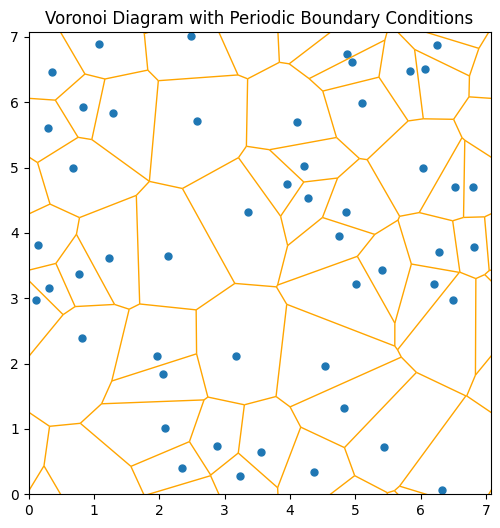

[118  74  55 102 125  56 176  64  72  71 153  75 155  73 120 149 128 121
  65 151  77 122 126 104 148 100  78 145 107 178 154 123 103  69 109  70
  89 115 150 129 116 119 106  76 124 105 127 152 101 157]


In [4]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi
from scipy.spatial import voronoi_plot_2d

# Given:
N_central_seeds = 50
Lx = np.sqrt(N_central_seeds)
Ly = np.sqrt(N_central_seeds)

# Derived:
N_extended_seeds = 4*N_central_seeds
Ld = np.sqrt(Lx**2 + Ly**2)

# Generate central seed coordinates
x = np.random.uniform(0, Lx, N_central_seeds)
y = np.random.uniform(0, Ly, N_central_seeds)
central_seed_coords = np.column_stack((x, y))  # shape (N, 2)

# Masks relative to box center
mx_left  = central_seed_coords[:, 0] >  Lx/2  # shift by (-Lx, 0)
mx_right = central_seed_coords[:, 0] <  Lx/2  # shift by (+Lx, 0)
my_down  = central_seed_coords[:, 1] >  Ly/2  # shift by (0, -Ly)
my_up    = central_seed_coords[:, 1] <  Ly/2  # shift by (0, +Ly)

# 1) originals (first N)
coords = [central_seed_coords]

# 2) left/right shifts
coords.append(central_seed_coords[mx_left]  + np.array([-Lx, 0.0]))
coords.append(central_seed_coords[mx_right] + np.array([+Lx, 0.0]))

# 3) up/down shifts
coords.append(central_seed_coords[my_down]  + np.array([0.0, -Ly]))
coords.append(central_seed_coords[my_up]    + np.array([0.0, +Ly]))

# 4) corner shifts (apply both x and y)
coords.append(central_seed_coords[mx_left  & my_down] + np.array([-Lx, -Ly]))
coords.append(central_seed_coords[mx_left  & my_up]   + np.array([-Lx, +Ly]))
coords.append(central_seed_coords[mx_right & my_down] + np.array([+Lx, -Ly]))
coords.append(central_seed_coords[mx_right & my_up]   + np.array([+Lx, +Ly]))

# Final array: originals first, then all shifted copies
extended_seed_coords = np.vstack(coords)

# Generate extended_seed_image_indices
extended_seed_image_indices = np.zeros((N_extended_seeds,3), dtype=int)
for n in range(N_extended_seeds):
    q = 0
    for m in range(N_extended_seeds):
        if m != n:
            dist = np.linalg.norm(extended_seed_coords[n] - extended_seed_coords[m])
            if (np.abs(dist - Lx) < 1e-8) or (np.abs(dist - Ly) < 1e-8) or (np.abs(dist - Ld) < 1e-8):
                extended_seed_image_indices[n, q] = m
                q += 1

vor = Voronoi(extended_seed_coords)

fig, ax = plt.subplots(figsize=(6, 6))
voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors='orange', line_width=1, point_size=10)
ax.set_xlim(0, Lx)
ax.set_ylim(0, Ly)
ax.set_aspect('equal', adjustable='box')
ax.set_title('Voronoi Diagram with Periodic Boundary Conditions')
plt.show()

central_region_indices = np.zeros((N_central_seeds,), dtype=int)
for n in range(N_central_seeds):
    central_region_indices[n] = vor.point_region[n]
    
print(central_region_indices)


# Find shifts for extended central seeds

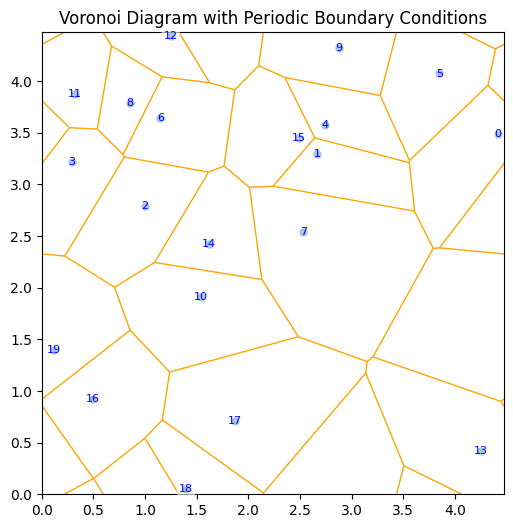

[39, 33, 29, 7, 4, 5, 1]
[[3, 49], [95, 97], [49, 95], [3, 101], [131, 132], [97, 131], [101, 132]]


In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi
from scipy.spatial import voronoi_plot_2d

# Given:
N_central_seeds = 20
Lx = np.sqrt(N_central_seeds)
Ly = np.sqrt(N_central_seeds)

# Derived:
N_extended_seeds = 4*N_central_seeds
Ld = np.sqrt(Lx**2 + Ly**2)

# Generate central seed coordinates
x = np.random.uniform(0, Lx, N_central_seeds)
y = np.random.uniform(0, Ly, N_central_seeds)
central_seed_coords = np.column_stack((x, y))  # shape (N, 2)

# Masks relative to box center
mx_left  = central_seed_coords[:, 0] >  Lx/2  # shift by (-Lx, 0)
mx_right = central_seed_coords[:, 0] <  Lx/2  # shift by (+Lx, 0)
my_down  = central_seed_coords[:, 1] >  Ly/2  # shift by (0, -Ly)
my_up    = central_seed_coords[:, 1] <  Ly/2  # shift by (0, +Ly)

# 1) originals (first N)
coords = [central_seed_coords]

# 2) left/right shifts
coords.append(central_seed_coords[mx_left]  + np.array([-Lx, 0.0]))
coords.append(central_seed_coords[mx_right] + np.array([+Lx, 0.0]))

# 3) up/down shifts
coords.append(central_seed_coords[my_down]  + np.array([0.0, -Ly]))
coords.append(central_seed_coords[my_up]    + np.array([0.0, +Ly]))

# 4) corner shifts (apply both x and y)
coords.append(central_seed_coords[mx_left  & my_down] + np.array([-Lx, -Ly]))
coords.append(central_seed_coords[mx_left  & my_up]   + np.array([-Lx, +Ly]))
coords.append(central_seed_coords[mx_right & my_down] + np.array([+Lx, -Ly]))
coords.append(central_seed_coords[mx_right & my_up]   + np.array([+Lx, +Ly]))

# Final array: originals first, then all shifted copies
extended_seed_coords = np.vstack(coords)

# Generate extended_seed_image_indices
extended_seed_image_indices = np.zeros((N_extended_seeds,3), dtype=int)
for n in range(N_extended_seeds):
    q = 0
    for m in range(N_extended_seeds):
        if m != n:
            dist = np.linalg.norm(extended_seed_coords[n] - extended_seed_coords[m])
            if (np.abs(dist - Lx) < 1e-8) or (np.abs(dist - Ly) < 1e-8) or (np.abs(dist - Ld) < 1e-8):
                extended_seed_image_indices[n, q] = m
                q += 1
                
extended_central_indices = np.arange(N_extended_seeds)
extended_central_shifts = np.zeros((N_extended_seeds, 2), dtype=float)
for m in range(N_central_seeds, N_extended_seeds):
    for n in range(N_central_seeds):
        dist = np.linalg.norm(extended_seed_coords[n] - extended_seed_coords[m])
        if (np.abs(dist - Lx) < 1e-8) or (np.abs(dist - Ly) < 1e-8) or (np.abs(dist - Ld) < 1e-8):
            extended_central_indices[m] = n
            extended_central_shifts[m] = extended_seed_coords[m] - extended_seed_coords[n]
            break


vor = Voronoi(extended_seed_coords)

vertices_coords = vor.vertices
N_vertices = vertices_coords.shape[0]
vertices_image_indices = -np.ones((N_vertices, 3), dtype=int)
for n in range(N_vertices):
    q = 0
    for m in range(N_vertices):
        if m != n:
            dist = np.linalg.norm(vertices_coords[n] - vertices_coords[m])
            if (np.abs(dist - Lx) < 1e-8) or (np.abs(dist - Ly) < 1e-8) or (np.abs(dist - Ld) < 1e-8):
                vertices_image_indices[n, q] = m
                q += 1

fig, ax = plt.subplots(figsize=(6, 6))
voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors='orange', line_width=1, point_size=10)
ax.set_xlim(0, Lx)
ax.set_ylim(0, Ly)
ax.set_aspect('equal', adjustable='box')
ax.set_title('Voronoi Diagram with Periodic Boundary Conditions')

for i, (px, py) in enumerate(central_seed_coords):  # i is 0..N_central_seeds-1
    ax.text(px, py, str(i),
            fontsize=8, ha='center', va='center',
            color='blue', bbox=dict(boxstyle='round,pad=0.2', fc='white', ec='none', alpha=0.6))

plt.show()

# vor.ridge_points is an (R, 2) array of point indices for each ridge
ridge_points = vor.ridge_points
ridge_vertices = vor.ridge_vertices

# Initialize a list of empty lists
central_ridge_indices = [[] for _ in range(N_central_seeds)]
central_seed_neighbors = [[] for _ in range(N_central_seeds)]
central_seed_vertices = [[] for _ in range(N_central_seeds)]

# Iterate over ridges and assign them to the corresponding central seeds
for ridge_idx, (i, j) in enumerate(ridge_points):
    # If either endpoint of the ridge is a central seed
    if i < N_central_seeds:
        central_ridge_indices[i].append(ridge_idx)
        central_seed_neighbors[i].append(j)
        central_seed_vertices[i].append(ridge_vertices[ridge_idx])
    if j < N_central_seeds:
        central_ridge_indices[j].append(ridge_idx)
        central_seed_neighbors[j].append(i)
        central_seed_vertices[j].append(ridge_vertices[ridge_idx])
        
print(central_seed_neighbors[0])
print(central_seed_vertices[0])

# Reflect point across line function

In [6]:
def reflect_point_across_line(p0, p1, p2):
    """
    Reflect point p across the infinite line through p0->p1.
    Inputs/outputs are [x, y] lists/tuples.
    """
    x0, y0 = p0
    x1, y1 = p1
    x2, y2 = p2

    vx, vy = x1 - x0, y1 - y0
    denom = vx*vx + vy*vy
    if denom == 0:
        raise ValueError("p0 and p1 must be distinct to define a line.")

    # parameter t for orthogonal projection of P onto line AB
    t = ((x2 - x0)*vx + (y2 - y0)*vy) / denom
    


    # foot of the perpendicular (projection of P on the line)
    fx = x0 + t*vx
    fy = y0 + t*vy

    # mirror point: P' = 2F - P
    x3 = 2*fx - x2
    y3 = 2*fy - y2
    return [x3, y3]

reflect_point_across_line(vertices_coords[105], vertices_coords[106], central_seed_coords[15])

[-0.7154909593576604, 8.457836495697078]

# Find geometric center of a cell function

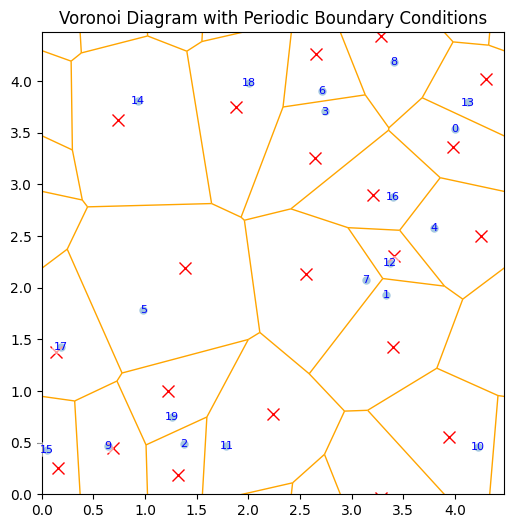

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi
from scipy.spatial import voronoi_plot_2d

# Given:
N_central_seeds = 20
Lx = np.sqrt(N_central_seeds)
Ly = np.sqrt(N_central_seeds)

# Derived:
N_extended_seeds = 4*N_central_seeds
Ld = np.sqrt(Lx**2 + Ly**2)

# Generate central seed coordinates
x = np.random.uniform(0, Lx, N_central_seeds)
y = np.random.uniform(0, Ly, N_central_seeds)
central_seed_coords = np.column_stack((x, y))  # shape (N, 2)

# Masks relative to box center
mx_left  = central_seed_coords[:, 0] >  Lx/2  # shift by (-Lx, 0)
mx_right = central_seed_coords[:, 0] <  Lx/2  # shift by (+Lx, 0)
my_down  = central_seed_coords[:, 1] >  Ly/2  # shift by (0, -Ly)
my_up    = central_seed_coords[:, 1] <  Ly/2  # shift by (0, +Ly)

# 1) originals (first N)
coords = [central_seed_coords]

# 2) left/right shifts
coords.append(central_seed_coords[mx_left]  + np.array([-Lx, 0.0]))
coords.append(central_seed_coords[mx_right] + np.array([+Lx, 0.0]))

# 3) up/down shifts
coords.append(central_seed_coords[my_down]  + np.array([0.0, -Ly]))
coords.append(central_seed_coords[my_up]    + np.array([0.0, +Ly]))

# 4) corner shifts (apply both x and y)
coords.append(central_seed_coords[mx_left  & my_down] + np.array([-Lx, -Ly]))
coords.append(central_seed_coords[mx_left  & my_up]   + np.array([-Lx, +Ly]))
coords.append(central_seed_coords[mx_right & my_down] + np.array([+Lx, -Ly]))
coords.append(central_seed_coords[mx_right & my_up]   + np.array([+Lx, +Ly]))

# Final array: originals first, then all shifted copies
extended_seed_coords = np.vstack(coords)

# Generate extended_central_indices and extended_central_shifts                
extended_central_indices = np.arange(N_extended_seeds)
extended_central_shifts = np.zeros((N_extended_seeds, 2), dtype=float)
for m in range(N_central_seeds, N_extended_seeds):
    for n in range(N_central_seeds):
        dist = np.linalg.norm(extended_seed_coords[n] - extended_seed_coords[m])
        if (np.abs(dist - Lx) < 1e-8) or (np.abs(dist - Ly) < 1e-8) or (np.abs(dist - Ld) < 1e-8):
            extended_central_indices[m] = n
            extended_central_shifts[m] = extended_seed_coords[m] - extended_seed_coords[n]
            break

vor = Voronoi(extended_seed_coords)

vertices_coords = vor.vertices
N_vertices = vertices_coords.shape[0]

# vor.ridge_points is an (R, 2) array of point indices for each ridge
ridge_points = vor.ridge_points
ridge_vertices = vor.ridge_vertices

# Initialize a list of empty lists
central_ridge_indices = [[] for _ in range(N_central_seeds)]
central_seed_neighbors = [[] for _ in range(N_central_seeds)]
central_seed_vertices = [[] for _ in range(N_central_seeds)]

# Iterate over ridges and assign them to the corresponding central seeds
for ridge_idx, (i, j) in enumerate(ridge_points):
    # If either endpoint of the ridge is a central seed
    if i < N_central_seeds:
        central_ridge_indices[i].append(ridge_idx)
        central_seed_neighbors[i].append(j)
        central_seed_vertices[i].append(ridge_vertices[ridge_idx])
    if j < N_central_seeds:
        central_ridge_indices[j].append(ridge_idx)
        central_seed_neighbors[j].append(i)
        central_seed_vertices[j].append(ridge_vertices[ridge_idx])

def find_geometric_centers(central_seed_vertices, vertices_coords):
    """
    Find the geometric centers of the Voronoi cells
    """
    
    centers = []
    for n in range(len(central_seed_vertices)):
        unique_vertices = np.unique(np.array(central_seed_vertices[n]).flatten())
        centers.append(np.mean(vertices_coords[unique_vertices], axis=0))
        
    centers = np.vstack(centers)
    
    return centers

initial_coords = np.zeros((N_extended_seeds, 2), dtype=float)
initial_coords[:N_central_seeds, :] = find_geometric_centers(central_seed_vertices, vertices_coords)
for m in range(N_central_seeds, N_extended_seeds):
    n = extended_central_indices[m]
    initial_coords[m, :] = initial_coords[n, :] + extended_central_shifts[m, :]


# Plotting
fig, ax = plt.subplots(figsize=(6, 6))
voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors='orange', line_width=1, point_size=10)
ax.set_xlim(0, Lx)
ax.set_ylim(0, Ly)
ax.set_aspect('equal', adjustable='box')
ax.set_title('Voronoi Diagram with Periodic Boundary Conditions')

for i, (px, py) in enumerate(central_seed_coords):  # i is 0..N_central_seeds-1
    ax.text(px, py, str(i),
            fontsize=8, ha='center', va='center',
            color='blue', bbox=dict(boxstyle='round,pad=0.2', fc='white', ec='none', alpha=0.6))
    
for i, (px, py) in enumerate(initial_coords):
    ax.plot(px, py, 'rx', markersize=8)
    
plt.show()

# Find next coords

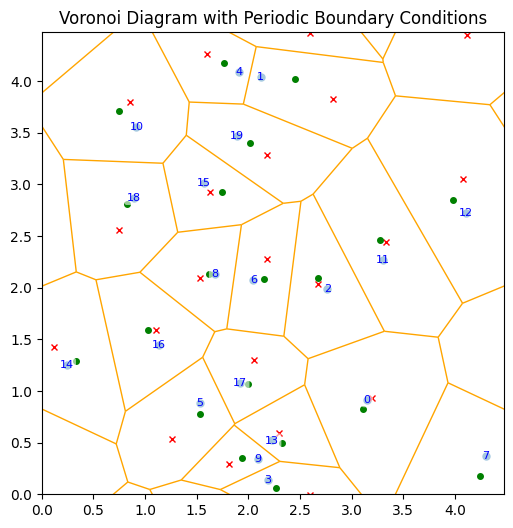

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi
from scipy.spatial import voronoi_plot_2d




def find_geometric_centers(central_seed_vertices, vertices_coords):
    """
    Find the geometric centers of the Voronoi cells
    """
    
    centers = []
    for n in range(len(central_seed_vertices)):
        unique_vertices = np.unique(np.array(central_seed_vertices[n]).flatten())
        centers.append(np.mean(vertices_coords[unique_vertices], axis=0))
        
    centers = np.vstack(centers)
    
    return centers    
    
    
def reflect_point_across_line(p0, p1, p2):
    """
    Reflect point p across the infinite line through p0->p1.
    Inputs/outputs are [x, y] lists/tuples.
    """
    x0, y0 = p0
    x1, y1 = p1
    x2, y2 = p2

    vx, vy = x1 - x0, y1 - y0
    denom = vx*vx + vy*vy
    if denom == 0:
        raise ValueError("p0 and p1 must be distinct to define a line.")

    # parameter t for orthogonal projection of P onto line AB
    t = ((x2 - x0)*vx + (y2 - y0)*vy) / denom

    # foot of the perpendicular (projection of P on the line)
    fx = x0 + t*vx
    fy = y0 + t*vy

    # mirror point: P' = 2F - P
    x3 = 2*fx - x2
    y3 = 2*fy - y2
    return [x3, y3]    
    

def find_next_coords(central_seed_neighbors, central_seed_vertices, vertices_coords, initial_coords, N_central_seeds, N_extended_seeds, extended_central_indices, extended_central_shifts):
    next_coords = np.zeros((N_extended_seeds, 2), dtype=float)

    for n in range(N_central_seeds):
        reflected_points = []
        for idx, m in enumerate(central_seed_neighbors[n]):
            p0 = vertices_coords[central_seed_vertices[n][idx][0]]
            p1 = vertices_coords[central_seed_vertices[n][idx][1]]
            p2 = initial_coords[m]
            p3 = reflect_point_across_line(p0, p1, p2)
            reflected_points.append(p3)    
        next_coords[n, :] = np.mean(np.array(reflected_points), axis=0)

    for m in range(N_central_seeds, N_extended_seeds):
        n = extended_central_indices[m]
        next_coords[m, :] = next_coords[n, :] + extended_central_shifts[m, :]
        
    return next_coords


# Given:
N_central_seeds = 20
Lx = np.sqrt(N_central_seeds)
Ly = np.sqrt(N_central_seeds)

# Derived:
N_extended_seeds = 4*N_central_seeds
Ld = np.sqrt(Lx**2 + Ly**2)

# Generate central seed coordinates
x = np.random.uniform(0, Lx, N_central_seeds)
y = np.random.uniform(0, Ly, N_central_seeds)
central_seed_coords = np.column_stack((x, y))  # shape (N, 2)

# Masks relative to box center
mx_left  = central_seed_coords[:, 0] >  Lx/2  # shift by (-Lx, 0)
mx_right = central_seed_coords[:, 0] <  Lx/2  # shift by (+Lx, 0)
my_down  = central_seed_coords[:, 1] >  Ly/2  # shift by (0, -Ly)
my_up    = central_seed_coords[:, 1] <  Ly/2  # shift by (0, +Ly)

# 1) originals (first N)
coords = [central_seed_coords]

# 2) left/right shifts
coords.append(central_seed_coords[mx_left]  + np.array([-Lx, 0.0]))
coords.append(central_seed_coords[mx_right] + np.array([+Lx, 0.0]))

# 3) up/down shifts
coords.append(central_seed_coords[my_down]  + np.array([0.0, -Ly]))
coords.append(central_seed_coords[my_up]    + np.array([0.0, +Ly]))

# 4) corner shifts (apply both x and y)
coords.append(central_seed_coords[mx_left  & my_down] + np.array([-Lx, -Ly]))
coords.append(central_seed_coords[mx_left  & my_up]   + np.array([-Lx, +Ly]))
coords.append(central_seed_coords[mx_right & my_down] + np.array([+Lx, -Ly]))
coords.append(central_seed_coords[mx_right & my_up]   + np.array([+Lx, +Ly]))

# Final array: originals first, then all shifted copies
extended_seed_coords = np.vstack(coords)

# Generate extended_central_indices and extended_central_shifts                
extended_central_indices = np.arange(N_extended_seeds)
extended_central_shifts = np.zeros((N_extended_seeds, 2), dtype=float)
for m in range(N_central_seeds, N_extended_seeds):
    for n in range(N_central_seeds):
        dist = np.linalg.norm(extended_seed_coords[n] - extended_seed_coords[m])
        if (np.abs(dist - Lx) < 1e-8) or (np.abs(dist - Ly) < 1e-8) or (np.abs(dist - Ld) < 1e-8):
            extended_central_indices[m] = n
            extended_central_shifts[m] = extended_seed_coords[m] - extended_seed_coords[n]
            break

vor = Voronoi(extended_seed_coords)

vertices_coords = vor.vertices
N_vertices = vertices_coords.shape[0]

# vor.ridge_points is an (R, 2) array of point indices for each ridge
ridge_points = vor.ridge_points
ridge_vertices = vor.ridge_vertices

# Initialize a list of empty lists
central_ridge_indices = [[] for _ in range(N_central_seeds)]
central_seed_neighbors = [[] for _ in range(N_central_seeds)]
central_seed_vertices = [[] for _ in range(N_central_seeds)]

# Iterate over ridges and assign them to the corresponding central seeds
for ridge_idx, (i, j) in enumerate(ridge_points):
    # If either endpoint of the ridge is a central seed
    if i < N_central_seeds:
        central_ridge_indices[i].append(ridge_idx)
        central_seed_neighbors[i].append(j)
        central_seed_vertices[i].append(ridge_vertices[ridge_idx])
    if j < N_central_seeds:
        central_ridge_indices[j].append(ridge_idx)
        central_seed_neighbors[j].append(i)
        central_seed_vertices[j].append(ridge_vertices[ridge_idx])


initial_coords = np.zeros((N_extended_seeds, 2), dtype=float)
initial_coords[:N_central_seeds, :] = find_geometric_centers(central_seed_vertices, vertices_coords)
for m in range(N_central_seeds, N_extended_seeds):
    n = extended_central_indices[m]
    initial_coords[m, :] = initial_coords[n, :] + extended_central_shifts[m, :]


current_coords = np.copy(initial_coords)

next_coords = find_next_coords(central_seed_neighbors, central_seed_vertices, vertices_coords, initial_coords, N_central_seeds, N_extended_seeds, extended_central_indices, extended_central_shifts)

    
# Plotting
fig, ax = plt.subplots(figsize=(6, 6))
voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors='orange', line_width=1, point_size=10)
ax.set_xlim(0, Lx)
ax.set_ylim(0, Ly)
ax.set_aspect('equal', adjustable='box')
ax.set_title('Voronoi Diagram with Periodic Boundary Conditions')

for i, (px, py) in enumerate(central_seed_coords):  # i is 0..N_central_seeds-1
    ax.text(px, py, str(i),
            fontsize=8, ha='center', va='center',
            color='blue', bbox=dict(boxstyle='round,pad=0.2', fc='white', ec='none', alpha=0.6))
    
for i, (px, py) in enumerate(initial_coords):
    ax.plot(px, py, 'rx', markersize=4)
    
for i, (px, py) in enumerate(next_coords):
    ax.plot(px, py, 'go', markersize=4)
    
plt.show()

# Clean Code

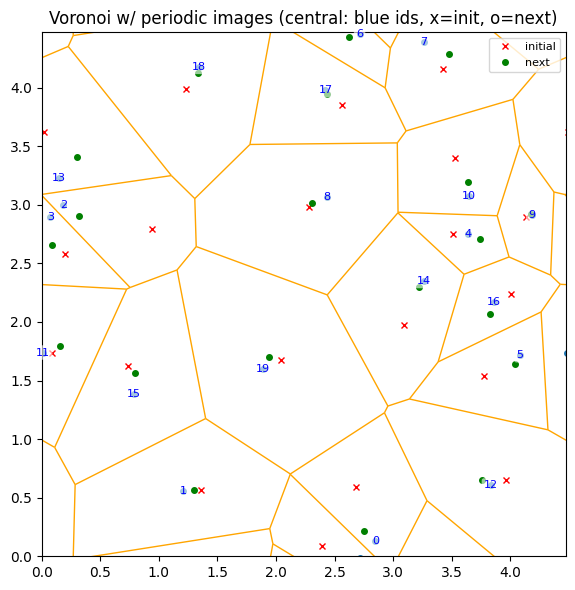

In [9]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi
from scipy.spatial import voronoi_plot_2d


# ----------------------------
# Geometry helpers
# ----------------------------
def reflect_point_across_line(p0, p1, p):
    """Reflect point p across the infinite line through p0->p1. Returns np.array([x, y])."""
    p0 = np.asarray(p0, float)
    p1 = np.asarray(p1, float)
    p  = np.asarray(p,  float)
    v = p1 - p0
    denom = v @ v
    if denom == 0:
        raise ValueError("p0 and p1 must be distinct to define a line.")
    t = ((p - p0) @ v) / denom        # projection parameter
    f = p0 + t * v                    # foot point on line
    return 2 * f - p                  # mirror


def polygon_centroid(pts):
    """Simple centroid (mean) for a finite set of points; returns NaNs if empty."""
    if len(pts) == 0:
        return np.array([np.nan, np.nan], float)
    return np.mean(pts, axis=0)


# ----------------------------
# Periodic point set (images) — mask-based, no distance scans
# ----------------------------
def build_periodic_images(central_coords, Lx, Ly):
    """
    Construct augmented points (orig + 3 images per seed) and provide:
      - extended_seed_coords: (4N, 2)
      - extended_central_indices: (4N,) map each row -> central index
      - extended_central_shifts:  (4N, 2) applied shift from central
    Ordering:
      [ originals | horizontal images | vertical images | corner images ]
    Each central seed contributes exactly one from each group (L/R, D/U, corner).
    """
    N = central_coords.shape[0]
    # masks (strict halves)
    mx_left  = central_coords[:, 0] >  Lx / 2
    mx_right = central_coords[:, 0] <  Lx / 2
    my_down  = central_coords[:, 1] >  Ly / 2
    my_up    = central_coords[:, 1] <  Ly / 2

    # originals
    blocks = [central_coords]
    block_ids = [np.arange(N)]
    shifts = [np.zeros_like(central_coords)]

    # horizontal (L/R)
    left_idx  = np.where(mx_left)[0]
    right_idx = np.where(mx_right)[0]
    blocks += [central_coords[left_idx]  + np.array([-Lx, 0.0]),
               central_coords[right_idx] + np.array([+Lx, 0.0])]
    block_ids += [left_idx, right_idx]
    shifts += [np.tile([-Lx, 0.0], (len(left_idx), 1)),
               np.tile([+Lx, 0.0], (len(right_idx), 1))]

    # vertical (D/U)
    down_idx = np.where(my_down)[0]
    up_idx   = np.where(my_up)[0]
    blocks += [central_coords[down_idx] + np.array([0.0, -Ly]),
               central_coords[up_idx]   + np.array([0.0, +Ly])]
    block_ids += [down_idx, up_idx]
    shifts += [np.tile([0.0, -Ly], (len(down_idx), 1)),
               np.tile([0.0, +Ly], (len(up_idx), 1))]

    # corners
    ld_idx = np.where(mx_left  & my_down)[0]
    lu_idx = np.where(mx_left  & my_up)[0]
    rd_idx = np.where(mx_right & my_down)[0]
    ru_idx = np.where(mx_right & my_up)[0]
    blocks += [central_coords[ld_idx] + np.array([-Lx, -Ly]),
               central_coords[lu_idx] + np.array([-Lx, +Ly]),
               central_coords[rd_idx] + np.array([+Lx, -Ly]),
               central_coords[ru_idx] + np.array([+Lx, +Ly])]
    block_ids += [ld_idx, lu_idx, rd_idx, ru_idx]
    shifts += [np.tile([-Lx, -Ly], (len(ld_idx), 1)),
               np.tile([-Lx, +Ly], (len(lu_idx), 1)),
               np.tile([+Lx, -Ly], (len(rd_idx), 1)),
               np.tile([+Lx, +Ly], (len(ru_idx), 1))]

    extended_seed_coords = np.vstack(blocks)
    extended_central_indices = np.concatenate(block_ids)
    extended_central_shifts  = np.vstack(shifts)

    return extended_seed_coords, extended_central_indices, extended_central_shifts


# ----------------------------
# Voronoi graph over central seeds
# ----------------------------
def build_central_graph(vor, N_central):
    """
    Build per-central seed:
      - central_ridge_indices: list of lists of ridge indices
      - central_seed_neighbors: list of lists of neighbor site indices
      - central_seed_vertices: list of lists of ridge-vertex index pairs (may include -1)
    """
    ridge_points   = vor.ridge_points
    ridge_vertices = vor.ridge_vertices

    central_ridge_indices = [[] for _ in range(N_central)]
    central_seed_neighbors = [[] for _ in range(N_central)]
    central_seed_vertices = [[] for _ in range(N_central)]

    for ridx, (i, j) in enumerate(ridge_points):
        if i < N_central:
            central_ridge_indices[i].append(ridx)
            central_seed_neighbors[i].append(j)
            central_seed_vertices[i].append(ridge_vertices[ridx])
        if j < N_central:
            central_ridge_indices[j].append(ridx)
            central_seed_neighbors[j].append(i)
            central_seed_vertices[j].append(ridge_vertices[ridx])

    return central_ridge_indices, central_seed_neighbors, central_seed_vertices


def cell_centers_from_ridges(central_seed_vertices, vertices_coords, fallback_coords=None):
    """
    Approximate each central cell center as the mean of its *finite* Voronoi vertices
    gathered from incident ridges. If a cell has no finite vertices, use fallback.
    Returns (N_central, 2).
    """
    centers = []
    for n, ridge_vs in enumerate(central_seed_vertices):
        # collect finite vertices only (exclude -1)
        finite_lists = [rv for rv in ridge_vs if (len(rv) == 2 and rv[0] >= 0 and rv[1] >= 0)]
        unique_idx = np.unique(np.array(finite_lists).ravel()) if finite_lists else np.array([], dtype=int)
        ctr = polygon_centroid(vertices_coords[unique_idx]) if len(unique_idx) else np.array([np.nan, np.nan])
        if (np.isnan(ctr).any()) and fallback_coords is not None:
            ctr = fallback_coords[n]
        centers.append(ctr)
    return np.vstack(centers)


# ----------------------------
# One relaxation-like step via reflections
# ----------------------------
def next_positions(central_seed_neighbors, central_seed_vertices, vertices_coords,
                   initial_coords, N_central, extended_central_indices, extended_central_shifts):
    """
    For each central seed: reflect its neighbors across the corresponding ridge line and average.
    For images: copy central result + shift.
    Returns (4N, 2).
    """
    N_ext = len(extended_central_indices)
    nxt = np.zeros((N_ext, 2), float)

    # central seeds
    for n in range(N_central):
        reflecteds = []
        for (rv, m) in zip(central_seed_vertices[n], central_seed_neighbors[n]):
            # need a finite ridge (two finite vertices)
            if len(rv) == 2 and rv[0] >= 0 and rv[1] >= 0:
                p0 = vertices_coords[rv[0]]
                p1 = vertices_coords[rv[1]]
                p2 = initial_coords[m]
                reflecteds.append(reflect_point_across_line(p0, p1, p2))
        if reflecteds:
            nxt[n] = np.mean(reflecteds, axis=0)
        else:
            nxt[n] = initial_coords[n]  # fallback: stay put if no finite ridges

    # images
    for m in range(N_central, N_ext):
        n = extended_central_indices[m]
        nxt[m] = nxt[n] + extended_central_shifts[m]

    return nxt


# ============================
# Main script (kept compact)
# ============================
if __name__ == "__main__":
    # Problem setup
    N_central_seeds = 20
    Lx = np.sqrt(N_central_seeds)
    Ly = np.sqrt(N_central_seeds)

    rng = np.random.default_rng(0)
    central_seed_coords = np.column_stack((
        rng.uniform(0, Lx, N_central_seeds),
        rng.uniform(0, Ly, N_central_seeds)
    ))

    # Build periodic images & mapping
    extended_seed_coords, extended_central_indices, extended_central_shifts = \
        build_periodic_images(central_seed_coords, Lx, Ly)
    N_extended_seeds = extended_seed_coords.shape[0]

    # Voronoi on all points (orig + images)
    vor = Voronoi(extended_seed_coords)

    # Build graph for central seeds
    (central_ridge_indices,
     central_seed_neighbors,
     central_seed_vertices) = build_central_graph(vor, N_central_seeds)

    # Initial central positions: mean of finite vertices (fallback to central coords)
    vertices_coords = vor.vertices
    initial_coords = np.zeros((N_extended_seeds, 2), float)
    initial_coords[:N_central_seeds] = cell_centers_from_ridges(
        central_seed_vertices, vertices_coords, fallback_coords=central_seed_coords
    )
    
    # Image initial positions by shift
    initial_coords[N_central_seeds:] = (
        initial_coords[extended_central_indices[N_central_seeds:]] +
        extended_central_shifts[N_central_seeds:]
    )

    # One "update" step via reflections
    next_coords = next_positions(
        central_seed_neighbors, central_seed_vertices, vertices_coords,
        initial_coords, N_central_seeds, extended_central_indices, extended_central_shifts
    )

    # Plot
    fig, ax = plt.subplots(figsize=(6, 6))
    voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors='orange', line_width=1, point_size=8)
    ax.set_xlim(0, Lx); ax.set_ylim(0, Ly); ax.set_aspect('equal', adjustable='box')
    ax.set_title('Voronoi w/ periodic images (central: blue ids, x=init, o=next)')

    # label central seeds
    for i, (px, py) in enumerate(central_seed_coords):
        ax.text(px, py, str(i), fontsize=8, ha='center', va='center',
                color='blue', bbox=dict(boxstyle='round,pad=0.2', fc='white', ec='none', alpha=0.6))

    # draw initial (x) and next (o)
    ax.plot(initial_coords[:, 0], initial_coords[:, 1], 'rx', markersize=4, label='initial')
    ax.plot(next_coords[:, 0],    next_coords[:, 1],    'go', markersize=4, label='next')
    ax.legend(loc='upper right', fontsize=8)
    plt.tight_layout()
    plt.show()


# Iterative Code

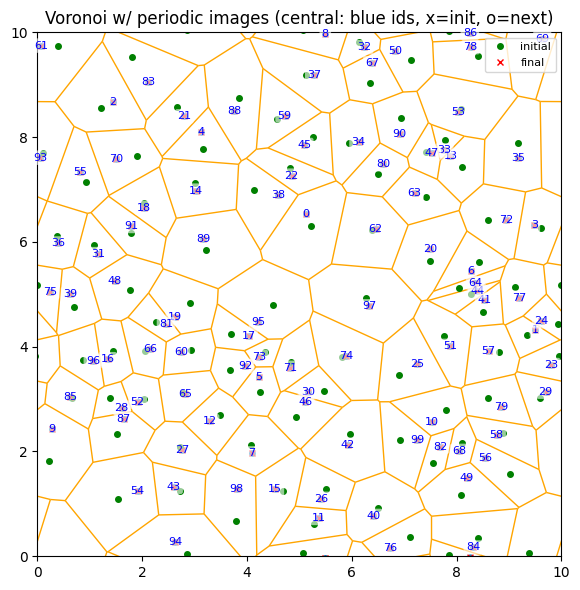

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi
from scipy.spatial import voronoi_plot_2d


# ----------------------------
# Geometry helpers
# ----------------------------
def reflect_point_across_line(p0, p1, p):
    """Reflect point p across the infinite line through p0->p1. Returns np.array([x, y])."""
    p0 = np.asarray(p0, float)
    p1 = np.asarray(p1, float)
    p  = np.asarray(p,  float)
    v = p1 - p0
    denom = v @ v
    if denom == 0:
        raise ValueError("p0 and p1 must be distinct to define a line.")
    t = ((p - p0) @ v) / denom        # projection parameter
    f = p0 + t * v                    # foot point on line
    return 2 * f - p                  # mirror


def polygon_centroid(pts):
    """Simple centroid (mean) for a finite set of points; returns NaNs if empty."""
    if len(pts) == 0:
        return np.array([np.nan, np.nan], float)
    return np.mean(pts, axis=0)


# ----------------------------
# Periodic point set (images) — mask-based, no distance scans
# ----------------------------
def build_periodic_images(central_coords, Lx, Ly):
    """
    Construct augmented points (orig + 3 images per seed) and provide:
      - extended_seed_coords: (4N, 2)
      - extended_central_indices: (4N,) map each row -> central index
      - extended_central_shifts:  (4N, 2) applied shift from central
    Ordering:
      [ originals | horizontal images | vertical images | corner images ]
    Each central seed contributes exactly one from each group (L/R, D/U, corner).
    """
    N = central_coords.shape[0]
    # masks (strict halves)
    mx_left  = central_coords[:, 0] >  Lx / 2
    mx_right = central_coords[:, 0] <  Lx / 2
    my_down  = central_coords[:, 1] >  Ly / 2
    my_up    = central_coords[:, 1] <  Ly / 2

    # originals
    blocks = [central_coords]
    block_ids = [np.arange(N)]
    shifts = [np.zeros_like(central_coords)]

    # horizontal (L/R)
    left_idx  = np.where(mx_left)[0]
    right_idx = np.where(mx_right)[0]
    blocks += [central_coords[left_idx]  + np.array([-Lx, 0.0]),
               central_coords[right_idx] + np.array([+Lx, 0.0])]
    block_ids += [left_idx, right_idx]
    shifts += [np.tile([-Lx, 0.0], (len(left_idx), 1)),
               np.tile([+Lx, 0.0], (len(right_idx), 1))]

    # vertical (D/U)
    down_idx = np.where(my_down)[0]
    up_idx   = np.where(my_up)[0]
    blocks += [central_coords[down_idx] + np.array([0.0, -Ly]),
               central_coords[up_idx]   + np.array([0.0, +Ly])]
    block_ids += [down_idx, up_idx]
    shifts += [np.tile([0.0, -Ly], (len(down_idx), 1)),
               np.tile([0.0, +Ly], (len(up_idx), 1))]

    # corners
    ld_idx = np.where(mx_left  & my_down)[0]
    lu_idx = np.where(mx_left  & my_up)[0]
    rd_idx = np.where(mx_right & my_down)[0]
    ru_idx = np.where(mx_right & my_up)[0]
    blocks += [central_coords[ld_idx] + np.array([-Lx, -Ly]),
               central_coords[lu_idx] + np.array([-Lx, +Ly]),
               central_coords[rd_idx] + np.array([+Lx, -Ly]),
               central_coords[ru_idx] + np.array([+Lx, +Ly])]
    block_ids += [ld_idx, lu_idx, rd_idx, ru_idx]
    shifts += [np.tile([-Lx, -Ly], (len(ld_idx), 1)),
               np.tile([-Lx, +Ly], (len(lu_idx), 1)),
               np.tile([+Lx, -Ly], (len(rd_idx), 1)),
               np.tile([+Lx, +Ly], (len(ru_idx), 1))]

    extended_seed_coords = np.vstack(blocks)
    extended_central_indices = np.concatenate(block_ids)
    extended_central_shifts  = np.vstack(shifts)

    return extended_seed_coords, extended_central_indices, extended_central_shifts


# ----------------------------
# Voronoi graph over central seeds
# ----------------------------
def build_central_graph(vor, N_central):
    """
    Build per-central seed:
      - central_ridge_indices: list of lists of ridge indices
      - central_seed_neighbors: list of lists of neighbor site indices
      - central_seed_vertices: list of lists of ridge-vertex index pairs (may include -1)
    """
    ridge_points   = vor.ridge_points
    ridge_vertices = vor.ridge_vertices

    central_ridge_indices = [[] for _ in range(N_central)]
    central_seed_neighbors = [[] for _ in range(N_central)]
    central_seed_vertices = [[] for _ in range(N_central)]

    for ridx, (i, j) in enumerate(ridge_points):
        if i < N_central:
            central_ridge_indices[i].append(ridx)
            central_seed_neighbors[i].append(j)
            central_seed_vertices[i].append(ridge_vertices[ridx])
        if j < N_central:
            central_ridge_indices[j].append(ridx)
            central_seed_neighbors[j].append(i)
            central_seed_vertices[j].append(ridge_vertices[ridx])

    return central_ridge_indices, central_seed_neighbors, central_seed_vertices


def cell_centers_from_ridges(central_seed_vertices, vertices_coords, fallback_coords=None):
    """
    Approximate each central cell center as the mean of its *finite* Voronoi vertices
    gathered from incident ridges. If a cell has no finite vertices, use fallback.
    Returns (N_central, 2).
    """
    centers = []
    for n, ridge_vs in enumerate(central_seed_vertices):
        # collect finite vertices only (exclude -1)
        finite_lists = [rv for rv in ridge_vs if (len(rv) == 2 and rv[0] >= 0 and rv[1] >= 0)]
        unique_idx = np.unique(np.array(finite_lists).ravel()) if finite_lists else np.array([], dtype=int)
        ctr = polygon_centroid(vertices_coords[unique_idx]) if len(unique_idx) else np.array([np.nan, np.nan])
        if (np.isnan(ctr).any()) and fallback_coords is not None:
            ctr = fallback_coords[n]
        centers.append(ctr)
    return np.vstack(centers)


# ----------------------------
# One relaxation-like step via reflections
# ----------------------------
def next_positions(central_seed_neighbors, central_seed_vertices, vertices_coords,
                   initial_coords, N_central, extended_central_indices, extended_central_shifts):
    """
    For each central seed: reflect its neighbors across the corresponding ridge line and average.
    For images: copy central result + shift.
    Returns (4N, 2).
    """
    N_ext = len(extended_central_indices)
    nxt = np.zeros((N_ext, 2), float)

    # central seeds
    for n in range(N_central):
        reflecteds = []
        for (rv, m) in zip(central_seed_vertices[n], central_seed_neighbors[n]):
            # need a finite ridge (two finite vertices)
            if len(rv) == 2 and rv[0] >= 0 and rv[1] >= 0:
                p0 = vertices_coords[rv[0]]
                p1 = vertices_coords[rv[1]]
                p2 = initial_coords[m]
                reflecteds.append(reflect_point_across_line(p0, p1, p2))
        if reflecteds:
            nxt[n] = np.mean(reflecteds, axis=0)
        else:
            nxt[n] = initial_coords[n]  # fallback: stay put if no finite ridges

    # images
    for m in range(N_central, N_ext):
        n = extended_central_indices[m]
        nxt[m] = nxt[n] + extended_central_shifts[m]

    return nxt


# ============================
# Main script (kept compact)
# ============================

# Problem setup
N_central_seeds = 100
Lx = np.sqrt(N_central_seeds)
Ly = np.sqrt(N_central_seeds)

rng = np.random.default_rng(1)
central_seed_coords = np.column_stack((
    rng.uniform(0, Lx, N_central_seeds),
    rng.uniform(0, Ly, N_central_seeds)
))

# Build periodic images & mapping
extended_seed_coords, extended_central_indices, extended_central_shifts = \
    build_periodic_images(central_seed_coords, Lx, Ly)
N_extended_seeds = extended_seed_coords.shape[0]

# Voronoi on all points (orig + images)
vor = Voronoi(extended_seed_coords)

# Build graph for central seeds
(central_ridge_indices,
    central_seed_neighbors,
    central_seed_vertices) = build_central_graph(vor, N_central_seeds)

# Initial central positions: mean of finite vertices (fallback to central coords)
vertices_coords = vor.vertices
initial_coords = np.zeros((N_extended_seeds, 2), float)
initial_coords[:N_central_seeds] = cell_centers_from_ridges(
    central_seed_vertices, vertices_coords, fallback_coords=central_seed_coords
)

# Image initial positions by shift
initial_coords[N_central_seeds:] = (
    initial_coords[extended_central_indices[N_central_seeds:]] +
    extended_central_shifts[N_central_seeds:]
)

current_coords = np.copy(initial_coords)

for t in range(100):
    next_coords = next_positions(
        central_seed_neighbors, central_seed_vertices, vertices_coords,
        current_coords, N_central_seeds, extended_central_indices, extended_central_shifts
    )
    current_coords = next_coords

final_coords = current_coords

# Plot
fig, ax = plt.subplots(figsize=(6, 6))
voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors='orange', line_width=1, point_size=8)
ax.set_xlim(0, Lx); ax.set_ylim(0, Ly); ax.set_aspect('equal', adjustable='box')
ax.set_title('Voronoi w/ periodic images (central: blue ids, x=init, o=next)')

# label central seeds
for i, (px, py) in enumerate(central_seed_coords):
    ax.text(px, py, str(i), fontsize=8, ha='center', va='center',
            color='blue', bbox=dict(boxstyle='round,pad=0.2', fc='white', ec='none', alpha=0.6))

# draw initial (x) and next (o)
ax.plot(initial_coords[:, 0], initial_coords[:, 1], 'go', markersize=4, label='initial')
ax.plot(final_coords[:, 0],    final_coords[:, 1],    'rx', markersize=4, label='final')
ax.legend(loc='upper right', fontsize=8)
plt.tight_layout()
plt.show()


# Color by final error

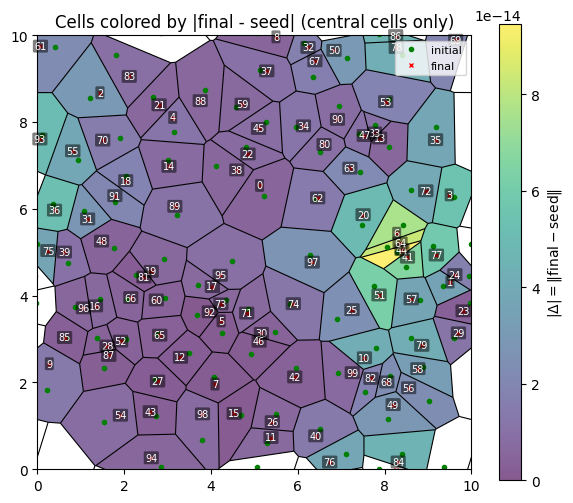

In [11]:
from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

# --- per-site displacement magnitude (for all points) ---
disp = np.linalg.norm(final_coords - extended_seed_coords, axis=1)  # (4N,)

# --- build filled polygons for central seeds only (0..N_central_seeds-1) ---
patches, colors = [], []
for i in range(N_central_seeds):
    r_idx = vor.point_region[i]
    region = vor.regions[r_idx]
    if not region or -1 in region:   # skip infinite/invalid regions
        continue
    poly = vor.vertices[region]
    patches.append(Polygon(poly, closed=True))
    colors.append(disp[i])            # color by displacement of seed i

# --- plot ---
fig, ax = plt.subplots(figsize=(6, 6))

# filled cells colored by |Δ|
pc = PatchCollection(patches, cmap='viridis', alpha=0.65, edgecolor='none')
pc.set_array(np.asarray(colors))
ax.add_collection(pc)

# overlay Voronoi edges for context
voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors='k', line_width=0.8, point_size=0)

# axes & title
ax.set_xlim(0, Lx); ax.set_ylim(0, Ly); ax.set_aspect('equal', adjustable='box')
ax.set_title('Cells colored by |final - seed| (central cells only)')

# (optional) annotate central seeds and scatter initial/final markers
for i, (px, py) in enumerate(central_seed_coords):
    ax.text(px, py, str(i), fontsize=7, ha='center', va='center',
            color='white', bbox=dict(boxstyle='round,pad=0.15', fc='black', ec='none', alpha=0.5))
ax.plot(initial_coords[:, 0], initial_coords[:, 1], 'go', ms=3, label='initial')
ax.plot(final_coords[:, 0],    final_coords[:, 1],    'rx', ms=3, label='final')
ax.legend(loc='upper right', fontsize=8)

# colorbar
cbar = plt.colorbar(pc, ax=ax, shrink=0.8)
cbar.set_label(r'$|\Delta| = \|\mathrm{final}-\mathrm{seed}\|$')

plt.tight_layout()
plt.show()


# Perturb central vertex

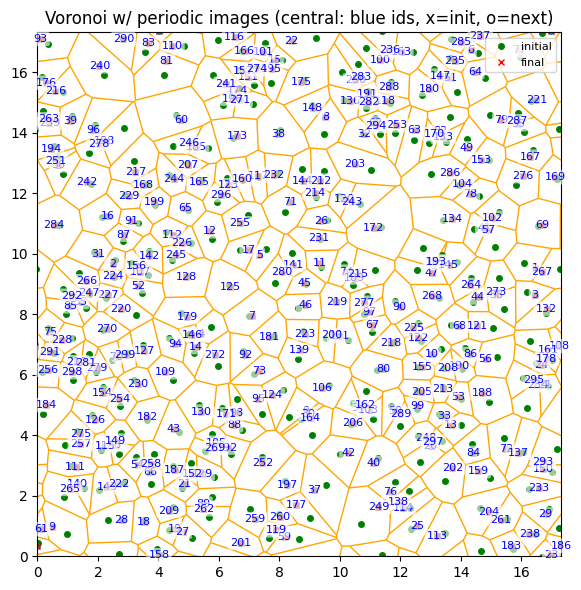

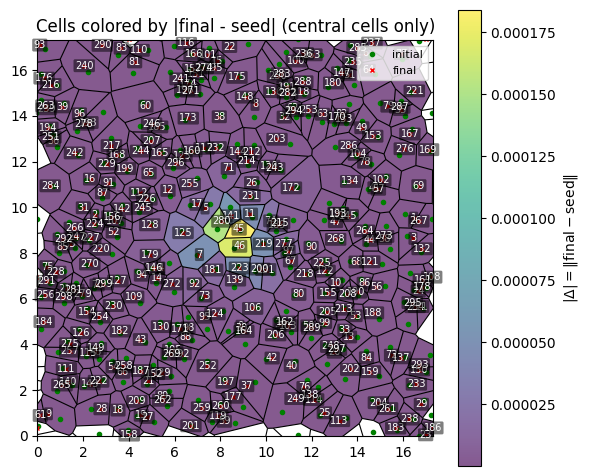

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi
from scipy.spatial import voronoi_plot_2d


# ----------------------------
# Geometry helpers
# ----------------------------
def reflect_point_across_line(p0, p1, p):
    """Reflect point p across the infinite line through p0->p1. Returns np.array([x, y])."""
    p0 = np.asarray(p0, float)
    p1 = np.asarray(p1, float)
    p  = np.asarray(p,  float)
    v = p1 - p0
    denom = v @ v
    if denom == 0:
        raise ValueError("p0 and p1 must be distinct to define a line.")
    t = ((p - p0) @ v) / denom        # projection parameter
    f = p0 + t * v                    # foot point on line
    return 2 * f - p                  # mirror


def polygon_centroid(pts):
    """Simple centroid (mean) for a finite set of points; returns NaNs if empty."""
    if len(pts) == 0:
        return np.array([np.nan, np.nan], float)
    return np.mean(pts, axis=0)


# ----------------------------
# Periodic point set (images) — mask-based, no distance scans
# ----------------------------
def build_periodic_images(central_coords, Lx, Ly):
    """
    Construct augmented points (orig + 3 images per seed) and provide:
      - extended_seed_coords: (4N, 2)
      - extended_central_indices: (4N,) map each row -> central index
      - extended_central_shifts:  (4N, 2) applied shift from central
    Ordering:
      [ originals | horizontal images | vertical images | corner images ]
    Each central seed contributes exactly one from each group (L/R, D/U, corner).
    """
    N = central_coords.shape[0]
    # masks (strict halves)
    mx_left  = central_coords[:, 0] >  Lx / 2
    mx_right = central_coords[:, 0] <  Lx / 2
    my_down  = central_coords[:, 1] >  Ly / 2
    my_up    = central_coords[:, 1] <  Ly / 2

    # originals
    blocks = [central_coords]
    block_ids = [np.arange(N)]
    shifts = [np.zeros_like(central_coords)]

    # horizontal (L/R)
    left_idx  = np.where(mx_left)[0]
    right_idx = np.where(mx_right)[0]
    blocks += [central_coords[left_idx]  + np.array([-Lx, 0.0]),
               central_coords[right_idx] + np.array([+Lx, 0.0])]
    block_ids += [left_idx, right_idx]
    shifts += [np.tile([-Lx, 0.0], (len(left_idx), 1)),
               np.tile([+Lx, 0.0], (len(right_idx), 1))]

    # vertical (D/U)
    down_idx = np.where(my_down)[0]
    up_idx   = np.where(my_up)[0]
    blocks += [central_coords[down_idx] + np.array([0.0, -Ly]),
               central_coords[up_idx]   + np.array([0.0, +Ly])]
    block_ids += [down_idx, up_idx]
    shifts += [np.tile([0.0, -Ly], (len(down_idx), 1)),
               np.tile([0.0, +Ly], (len(up_idx), 1))]

    # corners
    ld_idx = np.where(mx_left  & my_down)[0]
    lu_idx = np.where(mx_left  & my_up)[0]
    rd_idx = np.where(mx_right & my_down)[0]
    ru_idx = np.where(mx_right & my_up)[0]
    blocks += [central_coords[ld_idx] + np.array([-Lx, -Ly]),
               central_coords[lu_idx] + np.array([-Lx, +Ly]),
               central_coords[rd_idx] + np.array([+Lx, -Ly]),
               central_coords[ru_idx] + np.array([+Lx, +Ly])]
    block_ids += [ld_idx, lu_idx, rd_idx, ru_idx]
    shifts += [np.tile([-Lx, -Ly], (len(ld_idx), 1)),
               np.tile([-Lx, +Ly], (len(lu_idx), 1)),
               np.tile([+Lx, -Ly], (len(rd_idx), 1)),
               np.tile([+Lx, +Ly], (len(ru_idx), 1))]

    extended_seed_coords = np.vstack(blocks)
    extended_central_indices = np.concatenate(block_ids)
    extended_central_shifts  = np.vstack(shifts)

    return extended_seed_coords, extended_central_indices, extended_central_shifts


# ----------------------------
# Voronoi graph over central seeds
# ----------------------------
def build_central_graph(vor, N_central):
    """
    Build per-central seed:
      - central_ridge_indices: list of lists of ridge indices
      - central_seed_neighbors: list of lists of neighbor site indices
      - central_seed_vertices: list of lists of ridge-vertex index pairs (may include -1)
    """
    ridge_points   = vor.ridge_points
    ridge_vertices = vor.ridge_vertices

    central_ridge_indices = [[] for _ in range(N_central)]
    central_seed_neighbors = [[] for _ in range(N_central)]
    central_seed_vertices = [[] for _ in range(N_central)]

    for ridx, (i, j) in enumerate(ridge_points):
        if i < N_central:
            central_ridge_indices[i].append(ridx)
            central_seed_neighbors[i].append(j)
            central_seed_vertices[i].append(ridge_vertices[ridx])
        if j < N_central:
            central_ridge_indices[j].append(ridx)
            central_seed_neighbors[j].append(i)
            central_seed_vertices[j].append(ridge_vertices[ridx])

    return central_ridge_indices, central_seed_neighbors, central_seed_vertices


def cell_centers_from_ridges(central_seed_vertices, vertices_coords, fallback_coords=None):
    """
    Approximate each central cell center as the mean of its *finite* Voronoi vertices
    gathered from incident ridges. If a cell has no finite vertices, use fallback.
    Returns (N_central, 2).
    """
    centers = []
    for n, ridge_vs in enumerate(central_seed_vertices):
        # collect finite vertices only (exclude -1)
        finite_lists = [rv for rv in ridge_vs if (len(rv) == 2 and rv[0] >= 0 and rv[1] >= 0)]
        unique_idx = np.unique(np.array(finite_lists).ravel()) if finite_lists else np.array([], dtype=int)
        ctr = polygon_centroid(vertices_coords[unique_idx]) if len(unique_idx) else np.array([np.nan, np.nan])
        if (np.isnan(ctr).any()) and fallback_coords is not None:
            ctr = fallback_coords[n]
        centers.append(ctr)
    return np.vstack(centers)


# ----------------------------
# One relaxation-like step via reflections
# ----------------------------
def next_positions(central_seed_neighbors, central_seed_vertices, vertices_coords,
                   initial_coords, N_central, extended_central_indices, extended_central_shifts):
    """
    For each central seed: reflect its neighbors across the corresponding ridge line and average.
    For images: copy central result + shift.
    Returns (4N, 2).
    """
    N_ext = len(extended_central_indices)
    nxt = np.zeros((N_ext, 2), float)

    # central seeds
    for n in range(N_central):
        reflecteds = []
        for (rv, m) in zip(central_seed_vertices[n], central_seed_neighbors[n]):
            # need a finite ridge (two finite vertices)
            if len(rv) == 2 and rv[0] >= 0 and rv[1] >= 0:
                p0 = vertices_coords[rv[0]]
                p1 = vertices_coords[rv[1]]
                p2 = initial_coords[m]
                reflecteds.append(reflect_point_across_line(p0, p1, p2))
        if reflecteds:
            nxt[n] = np.mean(reflecteds, axis=0)
        else:
            nxt[n] = initial_coords[n]  # fallback: stay put if no finite ridges

    # images
    for m in range(N_central, N_ext):
        n = extended_central_indices[m]
        nxt[m] = nxt[n] + extended_central_shifts[m]

    return nxt


# ============================
# Main script (kept compact)
# ============================

# Problem setup
N_central_seeds = 300
Lx = np.sqrt(N_central_seeds)
Ly = np.sqrt(N_central_seeds)

rng = np.random.default_rng(1)
central_seed_coords = np.column_stack((
    rng.uniform(0, Lx, N_central_seeds),
    rng.uniform(0, Ly, N_central_seeds)
))

# Build periodic images & mapping
extended_seed_coords, extended_central_indices, extended_central_shifts = \
    build_periodic_images(central_seed_coords, Lx, Ly)
N_extended_seeds = extended_seed_coords.shape[0]

# Voronoi on all points (orig + images)
vor = Voronoi(extended_seed_coords)

# Build graph for central seeds
(central_ridge_indices,
    central_seed_neighbors,
    central_seed_vertices) = build_central_graph(vor, N_central_seeds)

# Initial central positions: mean of finite vertices (fallback to central coords)
vertices_coords = vor.vertices
initial_coords = np.zeros((N_extended_seeds, 2), float)
initial_coords[:N_central_seeds] = cell_centers_from_ridges(
    central_seed_vertices, vertices_coords, fallback_coords=central_seed_coords
)

# Perturb central vertex
center = np.array([Lx / 2, Ly / 2])
dists = np.linalg.norm(vor.vertices - center, axis=1)
closest_idx = np.argmin(dists)
vertices_coords[closest_idx] += np.array([+0.01/Lx, +0.01/Ly])  # perturb

# Image initial positions by shift
initial_coords[N_central_seeds:] = (
    initial_coords[extended_central_indices[N_central_seeds:]] +
    extended_central_shifts[N_central_seeds:]
)

current_coords = np.copy(initial_coords)

for t in range(100):
    next_coords = next_positions(
        central_seed_neighbors, central_seed_vertices, vertices_coords,
        current_coords, N_central_seeds, extended_central_indices, extended_central_shifts
    )
    current_coords = next_coords

final_coords = current_coords

# Plot
fig, ax = plt.subplots(figsize=(6, 6))
voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors='orange', line_width=1, point_size=8)
ax.set_xlim(0, Lx); ax.set_ylim(0, Ly); ax.set_aspect('equal', adjustable='box')
ax.set_title('Voronoi w/ periodic images (central: blue ids, x=init, o=next)')

# label central seeds
for i, (px, py) in enumerate(central_seed_coords):
    ax.text(px, py, str(i), fontsize=8, ha='center', va='center',
            color='blue', bbox=dict(boxstyle='round,pad=0.2', fc='white', ec='none', alpha=0.6))

# draw initial (x) and next (o)
ax.plot(initial_coords[:, 0], initial_coords[:, 1], 'go', markersize=4, label='initial')
ax.plot(final_coords[:, 0],    final_coords[:, 1],    'rx', markersize=4, label='final')
ax.legend(loc='upper right', fontsize=8)
plt.tight_layout()
plt.show()


# ============================
# Plot displacement magnitude
# ============================

from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

# --- per-site displacement magnitude (for all points) ---
disp = np.linalg.norm(final_coords - extended_seed_coords, axis=1)  # (4N,)

# --- build filled polygons for central seeds only (0..N_central_seeds-1) ---
patches, colors = [], []
for i in range(N_central_seeds):
    r_idx = vor.point_region[i]
    region = vor.regions[r_idx]
    if not region or -1 in region:   # skip infinite/invalid regions
        continue
    poly = vor.vertices[region]
    patches.append(Polygon(poly, closed=True))
    colors.append(disp[i])            # color by displacement of seed i

# --- plot ---
fig, ax = plt.subplots(figsize=(6, 6))

# filled cells colored by |Δ|
pc = PatchCollection(patches, cmap='viridis', alpha=0.65, edgecolor='none')
pc.set_array(np.asarray(colors))
ax.add_collection(pc)

# overlay Voronoi edges for context
voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors='k', line_width=0.8, point_size=0)

# axes & title
ax.set_xlim(0, Lx); ax.set_ylim(0, Ly); ax.set_aspect('equal', adjustable='box')
ax.set_title('Cells colored by |final - seed| (central cells only)')

# (optional) annotate central seeds and scatter initial/final markers
for i, (px, py) in enumerate(central_seed_coords):
    ax.text(px, py, str(i), fontsize=7, ha='center', va='center',
            color='white', bbox=dict(boxstyle='round,pad=0.15', fc='black', ec='none', alpha=0.5))
ax.plot(initial_coords[:, 0], initial_coords[:, 1], 'go', ms=3, label='initial')
ax.plot(final_coords[:, 0],    final_coords[:, 1],    'rx', ms=3, label='final')
ax.legend(loc='upper right', fontsize=8)

# colorbar
cbar = plt.colorbar(pc, ax=ax, shrink=0.8)
cbar.set_label(r'$|\Delta| = \|\mathrm{final}-\mathrm{seed}\|$')

plt.tight_layout()
plt.show()





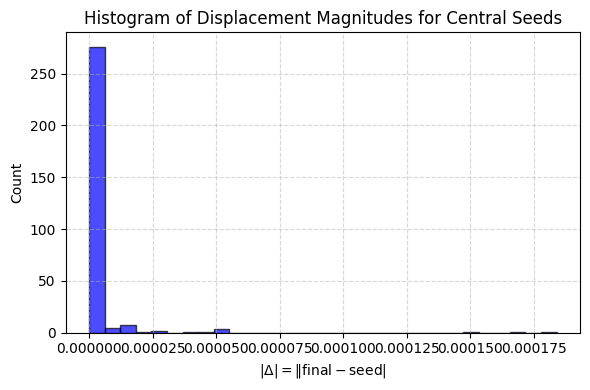

In [13]:
# Histogram of displacement magnitudes
plt.figure(figsize=(6,4))
plt.hist(disp[:N_central_seeds], bins=30, color='blue', alpha=0.7, edgecolor='black')
plt.xlabel(r'$|\Delta| = \|\mathrm{final}-\mathrm{seed}|$')
plt.ylabel('Count')
plt.title('Histogram of Displacement Magnitudes for Central Seeds')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

# Perturb gradually from left to right

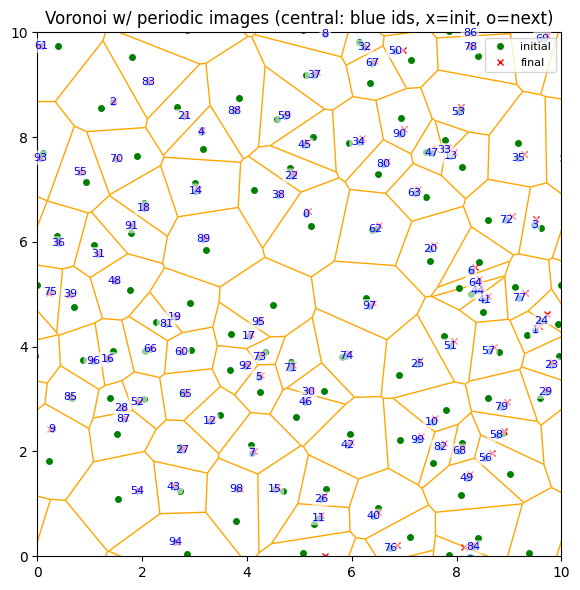

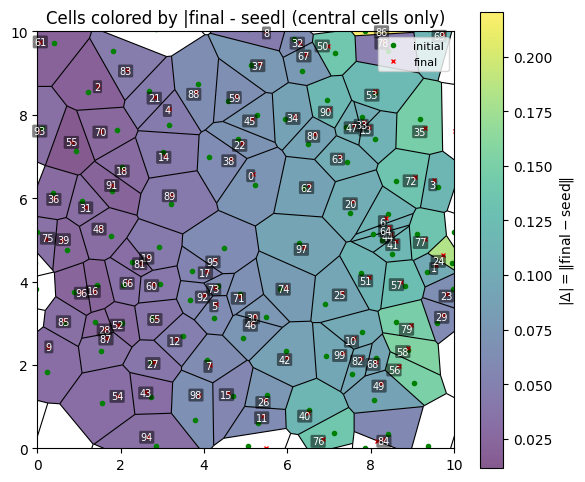

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import Voronoi
from scipy.spatial import voronoi_plot_2d


# ----------------------------
# Geometry helpers
# ----------------------------
def reflect_point_across_line(p0, p1, p):
    """Reflect point p across the infinite line through p0->p1. Returns np.array([x, y])."""
    p0 = np.asarray(p0, float)
    p1 = np.asarray(p1, float)
    p  = np.asarray(p,  float)
    v = p1 - p0
    denom = v @ v
    if denom == 0:
        raise ValueError("p0 and p1 must be distinct to define a line.")
    t = ((p - p0) @ v) / denom        # projection parameter
    f = p0 + t * v                    # foot point on line
    return 2 * f - p                  # mirror


def polygon_centroid(pts):
    """Simple centroid (mean) for a finite set of points; returns NaNs if empty."""
    if len(pts) == 0:
        return np.array([np.nan, np.nan], float)
    return np.mean(pts, axis=0)


# ----------------------------
# Periodic point set (images) — mask-based, no distance scans
# ----------------------------
def build_periodic_images(central_coords, Lx, Ly):
    """
    Construct augmented points (orig + 3 images per seed) and provide:
      - extended_seed_coords: (4N, 2)
      - extended_central_indices: (4N,) map each row -> central index
      - extended_central_shifts:  (4N, 2) applied shift from central
    Ordering:
      [ originals | horizontal images | vertical images | corner images ]
    Each central seed contributes exactly one from each group (L/R, D/U, corner).
    """
    N = central_coords.shape[0]
    # masks (strict halves)
    mx_left  = central_coords[:, 0] >  Lx / 2
    mx_right = central_coords[:, 0] <  Lx / 2
    my_down  = central_coords[:, 1] >  Ly / 2
    my_up    = central_coords[:, 1] <  Ly / 2

    # originals
    blocks = [central_coords]
    block_ids = [np.arange(N)]
    shifts = [np.zeros_like(central_coords)]

    # horizontal (L/R)
    left_idx  = np.where(mx_left)[0]
    right_idx = np.where(mx_right)[0]
    blocks += [central_coords[left_idx]  + np.array([-Lx, 0.0]),
               central_coords[right_idx] + np.array([+Lx, 0.0])]
    block_ids += [left_idx, right_idx]
    shifts += [np.tile([-Lx, 0.0], (len(left_idx), 1)),
               np.tile([+Lx, 0.0], (len(right_idx), 1))]

    # vertical (D/U)
    down_idx = np.where(my_down)[0]
    up_idx   = np.where(my_up)[0]
    blocks += [central_coords[down_idx] + np.array([0.0, -Ly]),
               central_coords[up_idx]   + np.array([0.0, +Ly])]
    block_ids += [down_idx, up_idx]
    shifts += [np.tile([0.0, -Ly], (len(down_idx), 1)),
               np.tile([0.0, +Ly], (len(up_idx), 1))]

    # corners
    ld_idx = np.where(mx_left  & my_down)[0]
    lu_idx = np.where(mx_left  & my_up)[0]
    rd_idx = np.where(mx_right & my_down)[0]
    ru_idx = np.where(mx_right & my_up)[0]
    blocks += [central_coords[ld_idx] + np.array([-Lx, -Ly]),
               central_coords[lu_idx] + np.array([-Lx, +Ly]),
               central_coords[rd_idx] + np.array([+Lx, -Ly]),
               central_coords[ru_idx] + np.array([+Lx, +Ly])]
    block_ids += [ld_idx, lu_idx, rd_idx, ru_idx]
    shifts += [np.tile([-Lx, -Ly], (len(ld_idx), 1)),
               np.tile([-Lx, +Ly], (len(lu_idx), 1)),
               np.tile([+Lx, -Ly], (len(rd_idx), 1)),
               np.tile([+Lx, +Ly], (len(ru_idx), 1))]

    extended_seed_coords = np.vstack(blocks)
    extended_central_indices = np.concatenate(block_ids)
    extended_central_shifts  = np.vstack(shifts)

    return extended_seed_coords, extended_central_indices, extended_central_shifts


# ----------------------------
# Voronoi graph over central seeds
# ----------------------------
def build_central_graph(vor, N_central):
    """
    Build per-central seed:
      - central_ridge_indices: list of lists of ridge indices
      - central_seed_neighbors: list of lists of neighbor site indices
      - central_seed_vertices: list of lists of ridge-vertex index pairs (may include -1)
    """
    ridge_points   = vor.ridge_points
    ridge_vertices = vor.ridge_vertices

    central_ridge_indices = [[] for _ in range(N_central)]
    central_seed_neighbors = [[] for _ in range(N_central)]
    central_seed_vertices = [[] for _ in range(N_central)]

    for ridx, (i, j) in enumerate(ridge_points):
        if i < N_central:
            central_ridge_indices[i].append(ridx)
            central_seed_neighbors[i].append(j)
            central_seed_vertices[i].append(ridge_vertices[ridx])
        if j < N_central:
            central_ridge_indices[j].append(ridx)
            central_seed_neighbors[j].append(i)
            central_seed_vertices[j].append(ridge_vertices[ridx])

    return central_ridge_indices, central_seed_neighbors, central_seed_vertices


def cell_centers_from_ridges(central_seed_vertices, vertices_coords, fallback_coords=None):
    """
    Approximate each central cell center as the mean of its *finite* Voronoi vertices
    gathered from incident ridges. If a cell has no finite vertices, use fallback.
    Returns (N_central, 2).
    """
    centers = []
    for n, ridge_vs in enumerate(central_seed_vertices):
        # collect finite vertices only (exclude -1)
        finite_lists = [rv for rv in ridge_vs if (len(rv) == 2 and rv[0] >= 0 and rv[1] >= 0)]
        unique_idx = np.unique(np.array(finite_lists).ravel()) if finite_lists else np.array([], dtype=int)
        ctr = polygon_centroid(vertices_coords[unique_idx]) if len(unique_idx) else np.array([np.nan, np.nan])
        if (np.isnan(ctr).any()) and fallback_coords is not None:
            ctr = fallback_coords[n]
        centers.append(ctr)
    return np.vstack(centers)


# ----------------------------
# One relaxation-like step via reflections
# ----------------------------
def next_positions(central_seed_neighbors, central_seed_vertices, vertices_coords,
                   initial_coords, N_central, extended_central_indices, extended_central_shifts):
    """
    For each central seed: reflect its neighbors across the corresponding ridge line and average.
    For images: copy central result + shift.
    Returns (4N, 2).
    """
    N_ext = len(extended_central_indices)
    nxt = np.zeros((N_ext, 2), float)

    # central seeds
    for n in range(N_central):
        reflecteds = []
        for (rv, m) in zip(central_seed_vertices[n], central_seed_neighbors[n]):
            # need a finite ridge (two finite vertices)
            if len(rv) == 2 and rv[0] >= 0 and rv[1] >= 0:
                p0 = vertices_coords[rv[0]]
                p1 = vertices_coords[rv[1]]
                p2 = initial_coords[m]
                reflecteds.append(reflect_point_across_line(p0, p1, p2))
        if reflecteds:
            nxt[n] = np.mean(reflecteds, axis=0)
        else:
            nxt[n] = initial_coords[n]  # fallback: stay put if no finite ridges

    # images
    for m in range(N_central, N_ext):
        n = extended_central_indices[m]
        nxt[m] = nxt[n] + extended_central_shifts[m]

    return nxt


# ============================
# Main script (kept compact)
# ============================

# Problem setup
N_central_seeds = 100
Lx = np.sqrt(N_central_seeds)
Ly = np.sqrt(N_central_seeds)

rng = np.random.default_rng(1)
central_seed_coords = np.column_stack((
    rng.uniform(0, Lx, N_central_seeds),
    rng.uniform(0, Ly, N_central_seeds)
))

# Build periodic images & mapping
extended_seed_coords, extended_central_indices, extended_central_shifts = \
    build_periodic_images(central_seed_coords, Lx, Ly)
N_extended_seeds = extended_seed_coords.shape[0]

# Voronoi on all points (orig + images)
vor = Voronoi(extended_seed_coords)

# Build graph for central seeds
(central_ridge_indices,
    central_seed_neighbors,
    central_seed_vertices) = build_central_graph(vor, N_central_seeds)

# Initial central positions: mean of finite vertices (fallback to central coords)
vertices_coords = vor.vertices
initial_coords = np.zeros((N_extended_seeds, 2), float)
initial_coords[:N_central_seeds] = cell_centers_from_ridges(
    central_seed_vertices, vertices_coords, fallback_coords=central_seed_coords
)

# Perturb gradually from left to right
for idx, (px, py) in enumerate(vertices_coords):
    if px < Lx and py < Ly and px > 0 and py > 0:
        # theta = np.random.uniform(0, 2*np.pi)
        # vertices_coords[idx, :] += 0.1*px/Lx*np.array([np.cos(theta), np.sin(theta)])
        vertices_coords[idx, :] += 0.1*np.array([px/Lx, px/Ly])  # small shift

# Image initial positions by shift
initial_coords[N_central_seeds:] = (
    initial_coords[extended_central_indices[N_central_seeds:]] +
    extended_central_shifts[N_central_seeds:]
)

current_coords = np.copy(initial_coords)

for t in range(200):
    next_coords = next_positions(
        central_seed_neighbors, central_seed_vertices, vertices_coords,
        current_coords, N_central_seeds, extended_central_indices, extended_central_shifts
    )
    current_coords = next_coords

final_coords = current_coords

# Plot
fig, ax = plt.subplots(figsize=(6, 6))
voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors='orange', line_width=1, point_size=8)
ax.set_xlim(0, Lx); ax.set_ylim(0, Ly); ax.set_aspect('equal', adjustable='box')
ax.set_title('Voronoi w/ periodic images (central: blue ids, x=init, o=next)')

# label central seeds
for i, (px, py) in enumerate(central_seed_coords):
    ax.text(px, py, str(i), fontsize=8, ha='center', va='center',
            color='blue', bbox=dict(boxstyle='round,pad=0.2', fc='white', ec='none', alpha=0.6))

# draw initial (x) and next (o)
ax.plot(initial_coords[:, 0], initial_coords[:, 1], 'go', markersize=4, label='initial')
ax.plot(final_coords[:, 0],    final_coords[:, 1],    'rx', markersize=4, label='final')
ax.legend(loc='upper right', fontsize=8)
plt.tight_layout()
plt.show()


# ============================
# Plot displacement magnitude
# ============================

from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection

# --- per-site displacement magnitude (for all points) ---
disp = np.linalg.norm(final_coords - extended_seed_coords, axis=1)  # (4N,)

# --- build filled polygons for central seeds only (0..N_central_seeds-1) ---
patches, colors = [], []
for i in range(N_central_seeds):
    r_idx = vor.point_region[i]
    region = vor.regions[r_idx]
    if not region or -1 in region:   # skip infinite/invalid regions
        continue
    poly = vor.vertices[region]
    patches.append(Polygon(poly, closed=True))
    colors.append(disp[i])            # color by displacement of seed i

# --- plot ---
fig, ax = plt.subplots(figsize=(6, 6))

# filled cells colored by |Δ|
pc = PatchCollection(patches, cmap='viridis', alpha=0.65, edgecolor='none')
pc.set_array(np.asarray(colors))
ax.add_collection(pc)

# overlay Voronoi edges for context
voronoi_plot_2d(vor, ax=ax, show_vertices=False, line_colors='k', line_width=0.8, point_size=0)

# axes & title
ax.set_xlim(0, Lx); ax.set_ylim(0, Ly); ax.set_aspect('equal', adjustable='box')
ax.set_title('Cells colored by |final - seed| (central cells only)')

# (optional) annotate central seeds and scatter initial/final markers
for i, (px, py) in enumerate(central_seed_coords):
    ax.text(px, py, str(i), fontsize=7, ha='center', va='center',
            color='white', bbox=dict(boxstyle='round,pad=0.15', fc='black', ec='none', alpha=0.5))
ax.plot(initial_coords[:, 0], initial_coords[:, 1], 'go', ms=3, label='initial')
ax.plot(final_coords[:, 0],    final_coords[:, 1],    'rx', ms=3, label='final')
ax.legend(loc='upper right', fontsize=8)

# colorbar
cbar = plt.colorbar(pc, ax=ax, shrink=0.8)
cbar.set_label(r'$|\Delta| = \|\mathrm{final}-\mathrm{seed}\|$')

plt.tight_layout()
plt.show()



